# Project 4: Regression Analysis

#### Question 1: Load the dataset

In [1]:
import csv
from collections import defaultdict

# Key: 
# Week # 
# Day of Week 
# Backup Start Time - Hour of Day 
# Work-Flow-ID : work_flow_0 ... work_flow_4
# File Name
# Size of Backup (GB)
# Backup Time (hour)

datareader = csv.DictReader(open('network_backup_dataset.csv', 'r'), delimiter=',')

current_day = 0 # Track the day of week
file_sizes = defaultdict(list) # Record file sizes for each work flow ID

for row in datareader:
    if row['Day of Week'] != current_day: # New day
        current_day = row['Day of Week']
        for i in range(5):
            file_sizes[i].append(0)
        file_sizes[int(row['Work-Flow-ID'][-1])][-1] += float(row['Size of Backup (GB)'])
    else: # Same day
        file_sizes[int(row['Work-Flow-ID'][-1])][-1] += float(row['Size of Backup (GB)'])

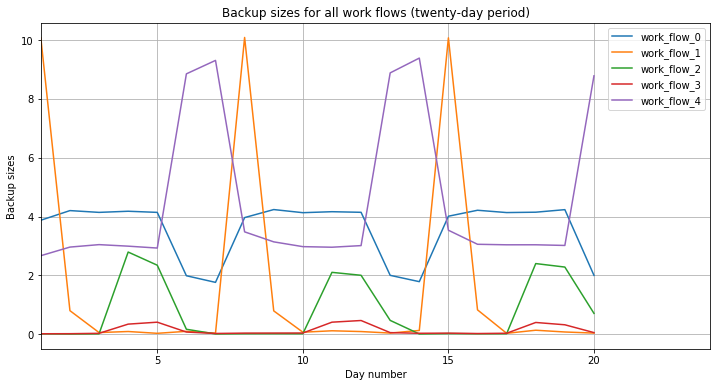

In [50]:
import matplotlib.pyplot as plt

# Plot 20 days
plt.figure(figsize=(12, 6))
plt.title("Backup sizes for all work flows (twenty-day period)")
for i in range(5):
    plt.plot(range(1, 21),file_sizes[i][0:20], label=('work_flow_%d' % i))
plt.xlabel('Day number')
plt.ylabel('Backup sizes')
plt.xlim(1, 24)
plt.legend()
plt.grid()
plt.savefig('Figures/Question1_a.png')  # Save the figure
plt.show()

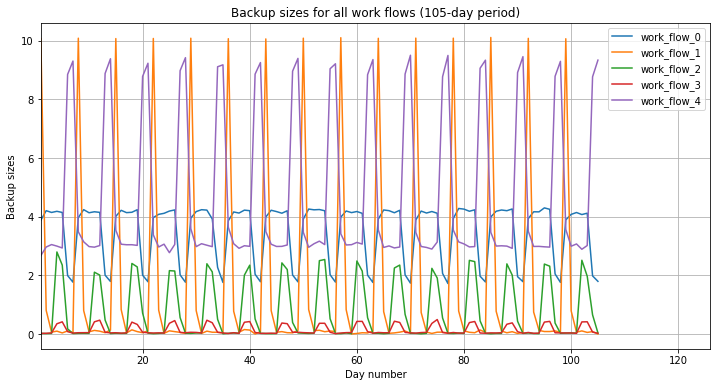

In [51]:
import matplotlib.pyplot as plt

# Plot 105 days
plt.figure(figsize=(12, 6))
plt.title("Backup sizes for all work flows (105-day period)")
for i in range(5):
    plt.plot(range(1, 106),file_sizes[i][0:106], label=('work_flow_%d' % i))
plt.xlabel('Day number')
plt.ylabel('Backup sizes')
plt.xlim(1, 126)
plt.legend()
plt.grid()
plt.savefig('Figures/Question1_b.png')  # Save the figure
plt.show()

#### Question 2: Predict

#### Feature sets and encoding schemes

In [2]:
import csv
import numpy as np

# Feature keys:
# Week # 
# Day of Week 
# Backup Start Time - Hour of Day 
# Work-Flow-ID : work_flow_0 ... work_flow_4
# File Name

# Target:
# Size of Backup (GB)

# Store all data
datareader = csv.DictReader(open('network_backup_dataset.csv', 'r'), delimiter=',') # Load data again
data_num = sum(1 for row in datareader) # Total number of samples
all_data_scalar = np.zeros((data_num, 6))

# For day of week
day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Scalar encoding
line_num = 0
datareader = csv.DictReader(open('network_backup_dataset.csv', 'r'), delimiter=',') # Load data again
for row in datareader:
    all_data_scalar[line_num, 0] = int(row['Week #'])
    all_data_scalar[line_num, 1] = day_name.index(row['Day of Week']) + 1
    all_data_scalar[line_num, 2] = int(row['Backup Start Time - Hour of Day'])
    all_data_scalar[line_num, 3] = int(row['Work-Flow-ID'][-1])
    all_data_scalar[line_num, 4] = int(row['File Name'].split('_')[1])
    all_data_scalar[line_num, 5] = float(row['Size of Backup (GB)'])
    line_num += 1

#### (a) (i)

Train RMSE: 
0.103585393643
Test RMSE: 
0.103675847676


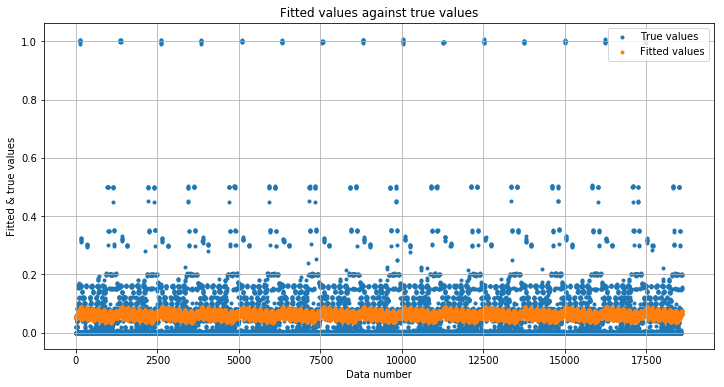

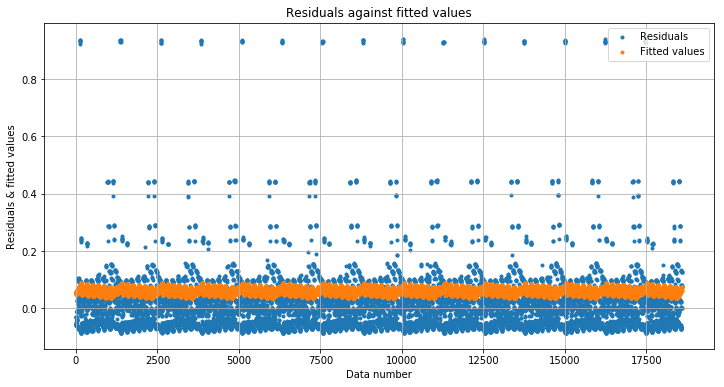

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Model
model = LinearRegression()

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
predict_values = model_whole.predict(all_data_scalar[:, 0:5])

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_i_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_i_residuals.png')  # Save the figure
plt.show()

#### (a) (ii)

Train RMSE: 
0.103585393643
Test RMSE: 
0.103675847676


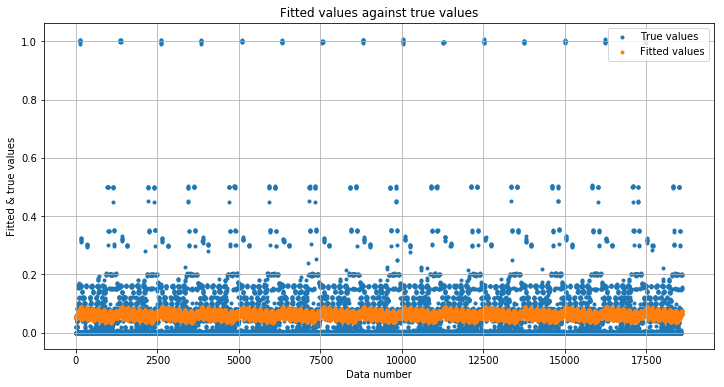

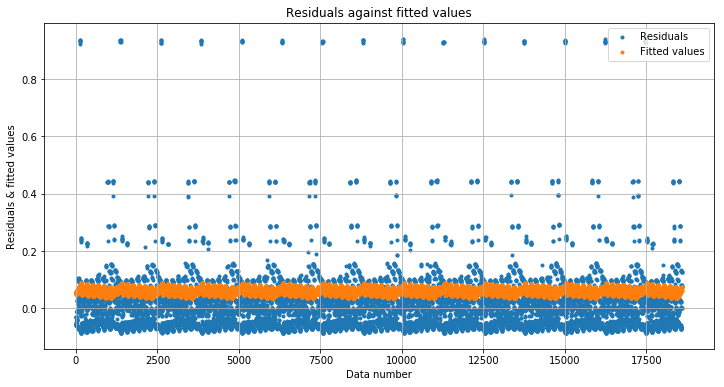

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model
model = LinearRegression()
scaler = StandardScaler()
standard_data = scaler.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, standard_data, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(standard_data, all_data_scalar[:, 5])
predict_values = model_whole.predict(standard_data)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_ii_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_ii_residuals.png')  # Save the figure
plt.show()

#### (a) (iii)

In [3]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Feature names
feature_names = ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
print('Features: ', feature_names, '\n')

# F regression
F, pval = f_regression(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
print('\nF regression socres: ', F)
print('\nThree most important variables using f_regression: ')
for i in (np.argsort(F)[-3:]):
    print(feature_names[i])
    
# Mutual info
mi = mutual_info_regression(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
print('\nMutual information regression socres: ', mi)
print('\nThree most important variables using mutual information regression: ')
for i in (np.argsort(mi)[-3:]):
    print(feature_names[i])

Features:  ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name'] 


F regression socres:  [  8.45006257e-03   3.88163798e+01   1.50740934e+02   2.61386654e+01
   2.53200943e+01]

Three most important variables using f_regression: 
Work-Flow-ID
Day of Week
Backup Start Time - Hour of Day

Mutual information regression socres:  [ 0.00123057  0.23653145  0.30156515  0.76632159  0.76471653]

Three most important variables using mutual information regression: 
Backup Start Time - Hour of Day
File Name
Work-Flow-ID


Train RMSE: 
0.103585682142
Test RMSE: 
0.103670661831


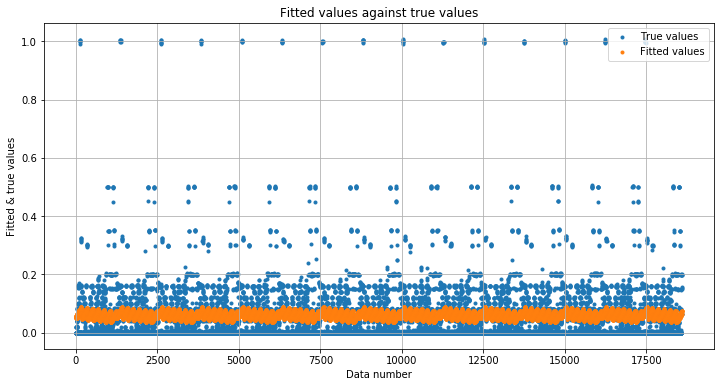

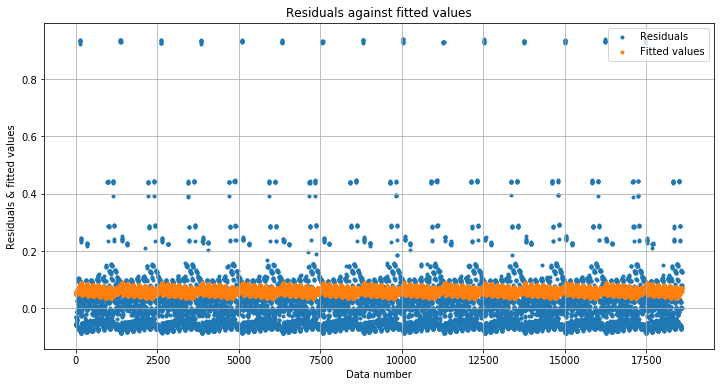

In [30]:
# Result using Work-Flow-ID File Name Week # (f_regression)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model
model = LinearRegression()
scaler = StandardScaler()
used_data = all_data_scalar[:, np.argsort(F)[-3:]]

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, used_data, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(used_data, all_data_scalar[:, 5])
predict_values = model_whole.predict(used_data)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_f_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_f_residuals.png')  # Save the figure
plt.show()

Train RMSE: 
0.103694528194
Test RMSE: 
0.103772293071


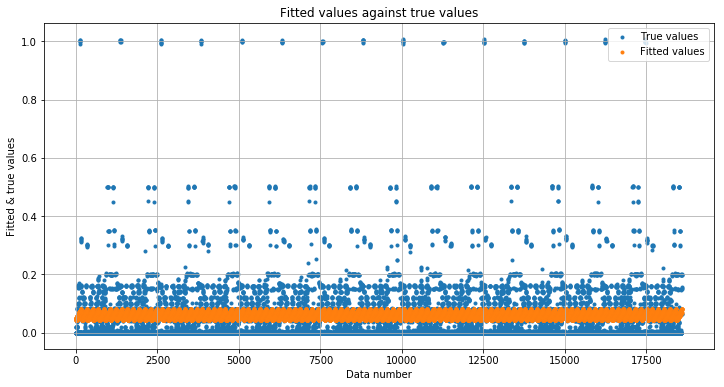

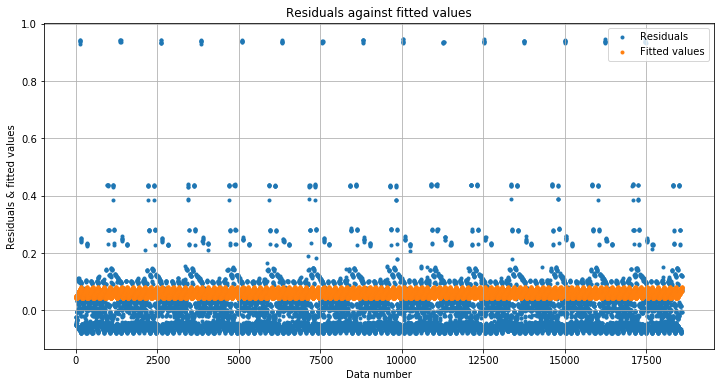

In [23]:
# Result using Backup Start Time - Hour of Day File Name Work-Flow-ID (mutual info)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model
model = LinearRegression()
scaler = StandardScaler()
used_data = all_data_scalar[:, np.argsort(mi)[-3:]]

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, used_data, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(used_data, all_data_scalar[:, 5])
predict_values = model_whole.predict(used_data)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_mu_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_mu_residuals.png')  # Save the figure
plt.show()

#### (a) (iv)

Train RMSE: 
[0.10358539364277801, 0.10358001893429987, 0.10214958101977546, 0.10236096535752824, 0.091338470040258621, 0.091337231461615043, 0.1021475657296249, 0.10235546668489652, 0.091333733969680322, 0.091332494847234602, 0.10090408487142001, 0.089754735938233465, 0.089753477462949524, 0.089950094482771831, 0.089948842684173247, 0.091337231461591742, 0.10090190985760661, 0.089753298363712194, 0.089752039826612284, 0.089945316790658203, 0.089944064321425779, 0.091332494847241777, 0.088337448618812278, 0.088336175967266631, 0.089753477462955394, 0.089948842684173719, 0.088335924248167066, 0.088334651345905443, 0.089752039826640234, 0.089944064321423711, 0.088336175967266811, 0.088334651345905263]
Test RMSE: 
[0.10367584767599031, 0.1143161440175253, 0.10223184702903818, 0.10246554440425953, 0.091497306190160221, 0.091498465269429105, 0.11136141337061428, 0.114609636644146, 0.094398477941524131, 0.094468712486018944, 0.10100030110654866, 0.089906779012020141, 0.089907956315623747, 0.

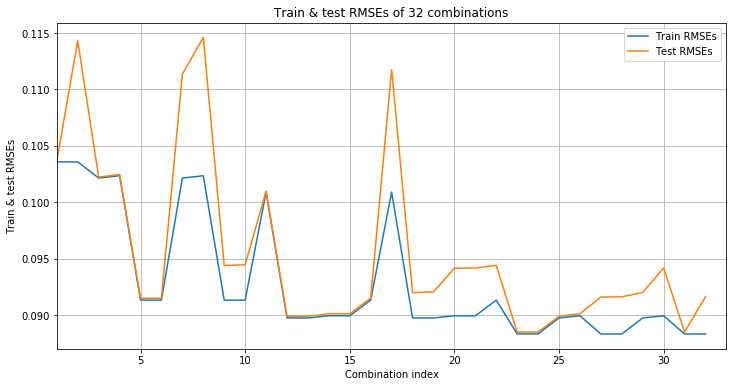

In [21]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for scheme in all_combinations:
    enc = OneHotEncoder(categorical_features=scheme)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = LinearRegression()
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
print('Best combinations: ')
best_combination = all_combinations[np.argmin(test_RMSEs)]
print('One-Hot features: ', [feature_names[i] for i in best_combination])
print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of 32 combinations")
plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
plt.xlabel('Combination index')
plt.ylabel('Train & test RMSEs')
plt.xlim(1, 33)
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iv.png')  # Save the figure
plt.show()

Train RMSE: 
0.0883374486188
Test RMSE: 
0.0885042609364


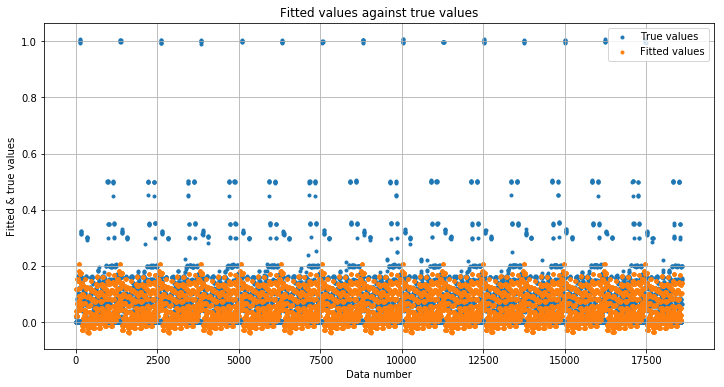

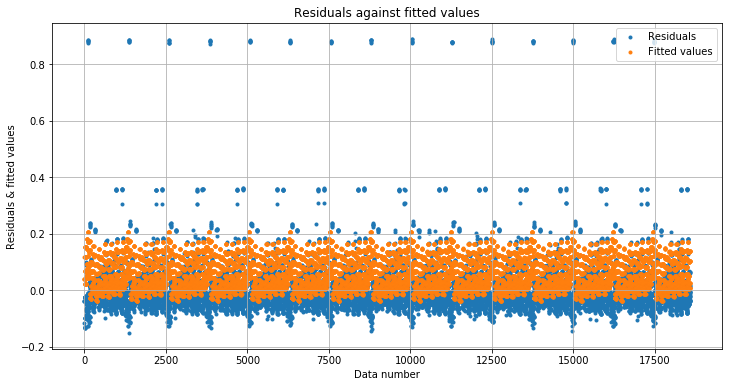

In [22]:
# Best model unregularized

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
model = LinearRegression()
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iv_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iv_residuals.png')  # Save the figure
plt.show()

#### (a) (v) Ridge Regularizer

--------------------------------------------------
Results using alpha =  0.0001
Train RMSE: 
[0.10358539364277801, 0.10358030162619747, 0.10214961738445752, 0.1023611205322376, 0.091338775943971301, 0.091337614022262065, 0.10214788176567809, 0.10235576914087111, 0.091334452463974994, 0.091332820669411036, 0.10090419987074732, 0.08975487815091332, 0.089754589949541524, 0.089950189049006993, 0.089948889724337289, 0.09133752189934792, 0.1009023494046964, 0.089753545589178793, 0.089752225838112459, 0.089945717722276275, 0.089944073601007535, 0.09133268421874427, 0.088337809425832692, 0.088336283082019962, 0.089753893178128, 0.089948883311498098, 0.088336420972583096, 0.088334666151856187, 0.089752181791882893, 0.089944076612935797, 0.08833622387151592, 0.088334659272727434]
Test RMSE: 
[0.10367584767575183, 0.10630043504542946, 0.10223323834710232, 0.1024635773716953, 0.091496421768814604, 0.091500136538703439, 0.104464831791843, 0.106103960206818, 0.091610583525593092, 0.0921980578220205

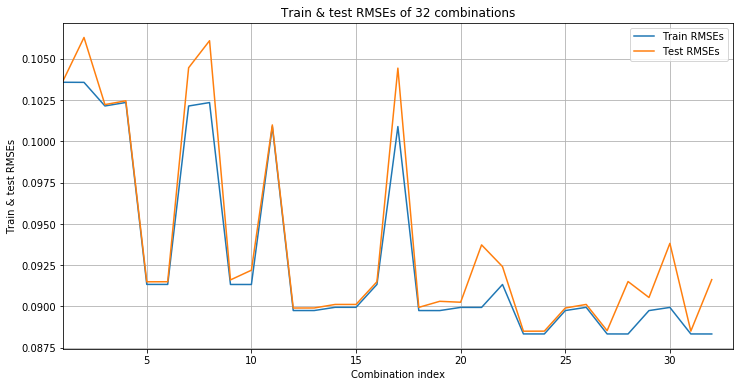

--------------------------------------------------
Results using alpha =  0.01
Train RMSE: 
[0.10358539364277813, 0.10358030262047627, 0.10214961017334276, 0.10236103054190522, 0.091338917289934624, 0.091337983572739367, 0.10214786974694892, 0.10235599413290744, 0.091334382385875421, 0.091332622711002162, 0.10090418295807496, 0.089754877918679657, 0.089754202781906781, 0.089950186259649706, 0.089949276885717244, 0.091337483920084978, 0.10090217777191612, 0.089753588786943131, 0.089752322672592255, 0.089945657040952851, 0.08994407521773673, 0.091332699537887502, 0.088337614585674101, 0.08833641636182446, 0.089753776541802055, 0.089948974486295949, 0.088336792048597457, 0.088334660629092815, 0.089752339823326907, 0.089944072437728645, 0.088336209804279781, 0.088334660101155288]
Test RMSE: 
[0.10367584765214384, 0.10629013895187685, 0.10223334904134261, 0.10246381082830602, 0.091499322403060426, 0.091503316556188832, 0.10444862397177758, 0.10607453204845778, 0.091613492604674926, 0.092192

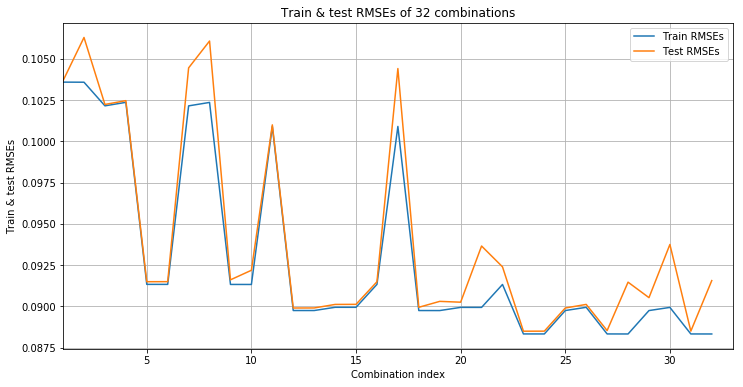

--------------------------------------------------
Results using alpha =  1
Train RMSE: 
[0.10358539364413825, 0.10358045042780262, 0.1021496556010329, 0.1023611330185651, 0.091338958265362813, 0.091337995635225891, 0.10214801051577416, 0.10235604386825864, 0.091334618803488699, 0.091332894650844182, 0.10090424412521702, 0.089754905974866211, 0.08975437562771324, 0.089950210362599758, 0.089948924421320853, 0.091337647445052114, 0.10090237281134297, 0.089753558799532535, 0.089752576118536473, 0.089945813567090221, 0.089944222822194012, 0.091333044633529439, 0.088337629424021749, 0.088336285256203864, 0.089753974627708108, 0.089949119527696311, 0.088336741192449469, 0.08833477287311188, 0.089752207157297106, 0.089944168804746066, 0.088336256215348019, 0.088334725852847643]
Test RMSE: 
[0.10367584529428608, 0.10526277649106168, 0.10223123498342461, 0.10246616826911348, 0.091497394456753103, 0.091499507773927707, 0.10349742221199701, 0.10410753547658569, 0.091600790753636308, 0.09183268409

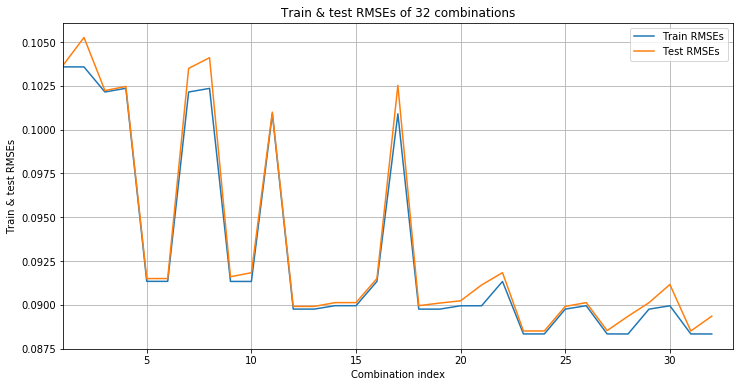

--------------------------------------------------
Results using alpha =  100
Train RMSE: 
[0.10358540538531615, 0.10358119696584737, 0.10216683675778186, 0.10236391076626092, 0.091351583785165585, 0.091639349499885281, 0.10215674688618016, 0.10235899254250114, 0.091346227631891708, 0.091631284707385685, 0.10090911705360446, 0.08977242591627474, 0.090062754082994273, 0.089965364296043529, 0.090252337673199512, 0.091346351970747239, 0.10090786971440137, 0.089769853423362397, 0.090057715331841759, 0.089961317585290523, 0.090247709771479792, 0.091341200144371956, 0.088354306881189296, 0.088646762585606248, 0.089766139388967991, 0.089959779870163792, 0.088353337324584363, 0.088645166950582763, 0.089763880133521254, 0.089954989176192671, 0.088349646620208361, 0.088348420185147256]
Test RMSE: 
[0.10367563590335632, 0.1037690169365149, 0.10225256967722721, 0.1024708919382803, 0.091512286497858059, 0.091792825117941707, 0.10235503633326282, 0.10254546939229545, 0.091588335256973963, 0.09192182

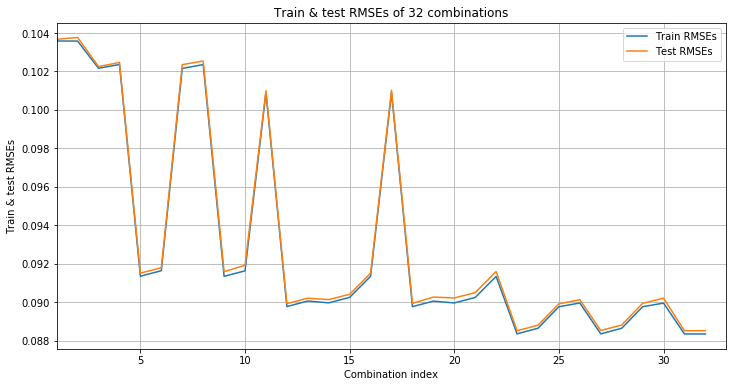

In [12]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# Try different alphas
alphas=[1e-4, 1e-2, 1, 100]

for alpha in alphas:
    
    print('-' * 50)
    print('Results using alpha = ', alpha)
    
    # RMSEs
    train_RMSEs = []
    test_RMSEs = []

    # One hot encoding

    for scheme in all_combinations:
        enc = OneHotEncoder(categorical_features=scheme)
        data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

        # CV
        model = Ridge(alpha=alpha)
        scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
        scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

        # RMSE
        train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
        test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))

    print('Train RMSE: ')
    print(train_RMSEs)
    print('Test RMSE: ')
    print(test_RMSEs)

    # Best combinations
    min_RMSE = min(test_RMSEs)
    print('\nMin test RMSE: ', min_RMSE)
    print('Best combinations: ')
    best_combination = all_combinations[np.argmin(test_RMSEs)]
    print('One-Hot features: ', [feature_names[i] for i in best_combination])
    print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

    # Plot the RMSEs
    plt.figure(figsize=(12, 6))
    plt.title("Train & test RMSEs of 32 combinations")
    plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
    plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
    plt.xlabel('Combination index')
    plt.ylabel('Train & test RMSEs')
    plt.xlim(1, 33)
    plt.grid()
    plt.legend()
    plt.savefig(('Figures/Question2_a_v_ridge_%f.png' % alpha))  # Save the figure
    plt.show()

Train RMSE: 
0.0883375937521
Test RMSE: 
0.0885047267501


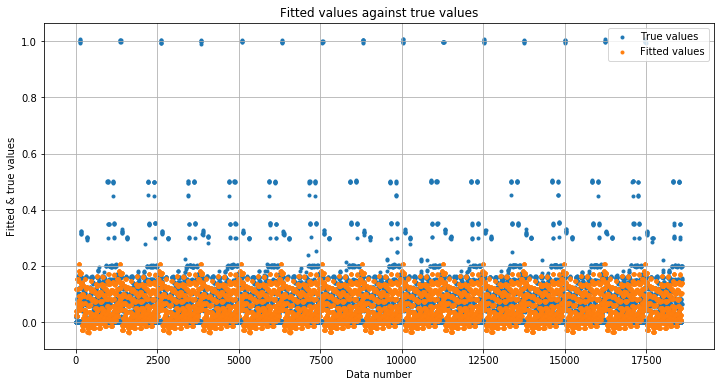

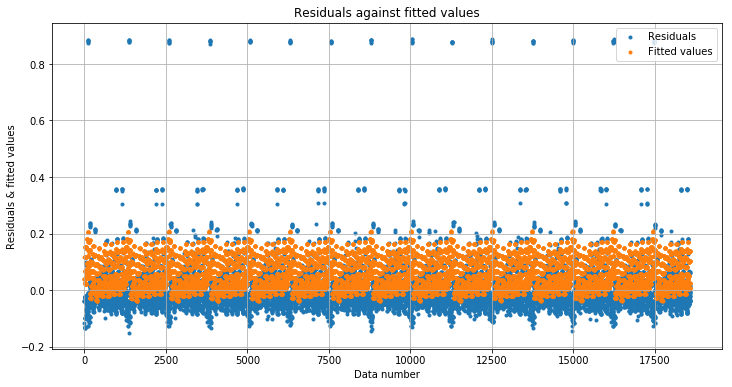

In [20]:
# Best model alpha = 0.01 One-Hot features:  ['Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID'] Scalar features:  ['Week #', 'File Name']

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
best_alpha = 0.01
best_combination = (1, 2, 3)

model = Ridge(alpha=best_alpha)
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = Ridge(alpha=best_alpha)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ridge_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ridge_residuals.png')  # Save the figure
plt.show()

#### (a) (v) Lasso Regularizer

--------------------------------------------------
Results using alpha =  0.0001
Train RMSE: 
[0.10358584242083367, 0.10358367415667559, 0.10215192009436647, 0.10236312404903987, 0.09133997693935865, 0.091371842862415065, 0.10215196709882358, 0.10236101469517618, 0.09133805295816784, 0.091369894002975405, 0.10090824087696997, 0.08975845796481885, 0.089790824949687445, 0.089953596838745389, 0.089985921595425414, 0.091339617221859834, 0.10090829092767571, 0.089758503321871352, 0.089790870488942229, 0.089951756346244333, 0.089984055378878186, 0.091337693101917292, 0.088343292149684477, 0.088376153170684799, 0.089758091100991574, 0.089953230423221189, 0.088343332774669117, 0.088376193976432219, 0.089758136451874804, 0.089951389758759132, 0.08834291786405854, 0.088342958485479808]
Test RMSE: 
[0.10367565103116869, 0.10370379813993326, 0.102233139546653, 0.10246700415554429, 0.091498094430520163, 0.091532117103578531, 0.10223232970964893, 0.10249423457557943, 0.091521150800608742, 0.09155576

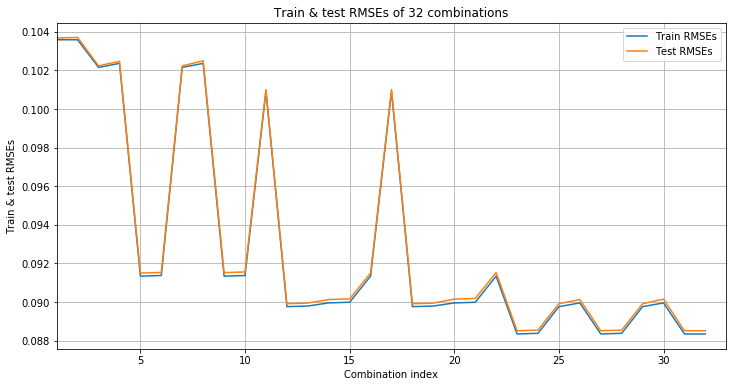

--------------------------------------------------
Results using alpha =  0.01
Train RMSE: 
[0.10371354864610559, 0.10371354864610559, 0.10371354864610559, 0.1041215417338153, 0.098883705039380612, 0.10377989038645959, 0.10371354864610559, 0.1041215417338153, 0.098883705039380612, 0.10377989038645959, 0.1041215417338153, 0.098883705039380612, 0.10377989038645959, 0.099314173697812438, 0.10418962821705531, 0.099980863694791935, 0.1041215417338153, 0.098883705039380612, 0.10377989038645959, 0.099314173697812438, 0.10418962821705531, 0.099980863694791935, 0.099314173697812438, 0.10418962821705531, 0.099980863694791935, 0.10040233004588195, 0.099314173697812438, 0.10418962821705531, 0.099980863694791935, 0.10040233004588195, 0.10040233004588195, 0.10040233004588195]
Test RMSE: 
[0.10378863601508743, 0.10378863601508743, 0.10378863601508743, 0.10419393455282913, 0.098973626858881961, 0.10378243626279741, 0.10378863601508743, 0.10419393455282913, 0.098973626858881961, 0.10378243626279741, 0.

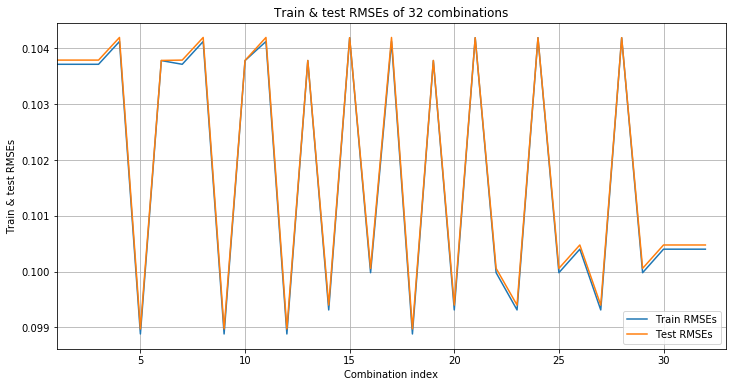

--------------------------------------------------
Results using alpha =  1
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.1041902378857

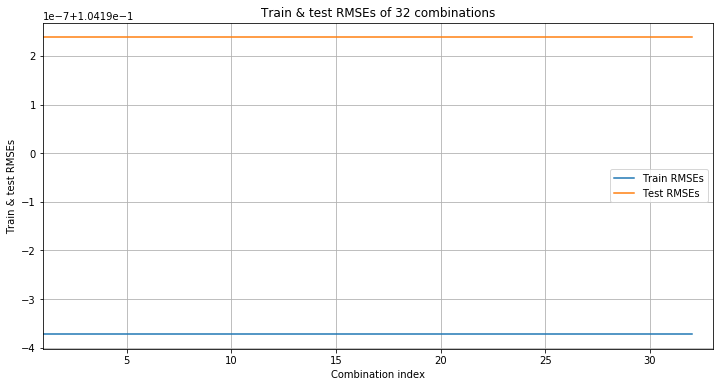

--------------------------------------------------
Results using alpha =  100
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788

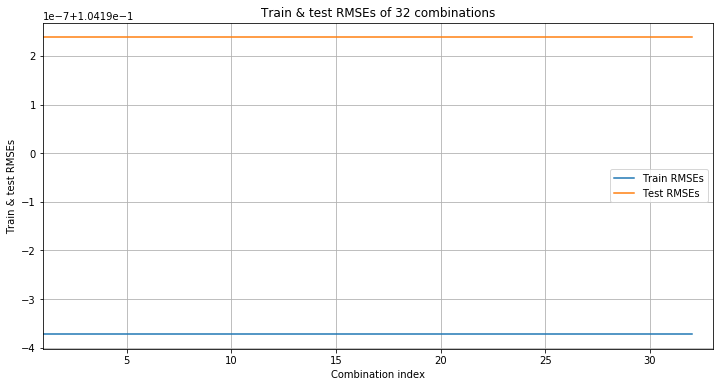

In [8]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# Try three different alphas
alphas = [1e-4, 1e-2, 1, 100]
for alpha in alphas:
    
    print('-' * 50)
    print('Results using alpha = ', alpha)

    # RMSEs
    train_RMSEs = []
    test_RMSEs = []

    # One hot encoding

    for scheme in all_combinations:
        enc = OneHotEncoder(categorical_features=scheme)
        data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

        # CV
        model = Lasso(alpha=alpha)
        scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
        scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

        # RMSE
        train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
        test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))

    print('Train RMSE: ')
    print(train_RMSEs)
    print('Test RMSE: ')
    print(test_RMSEs)

    # Best combinations
    min_RMSE = min(test_RMSEs)
    print('\nMin test RMSE: ', min_RMSE)
    print('Best combinations: ')
    best_combination = all_combinations[np.argmin(test_RMSEs)]
    print('One-Hot features: ', [feature_names[i] for i in best_combination])
    print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

    # Plot the RMSEs
    plt.figure(figsize=(12, 6))
    plt.title("Train & test RMSEs of 32 combinations")
    plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
    plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
    plt.xlabel('Combination index')
    plt.ylabel('Train & test RMSEs')
    plt.xlim(1, 33)
    plt.grid()
    plt.legend()
    plt.savefig(('Figures/Question2_a_v_lasso_%f.png' % alpha))  # Save the figure
    plt.show()

Train RMSE: 
0.0883429584855
Test RMSE: 
0.0885082492502


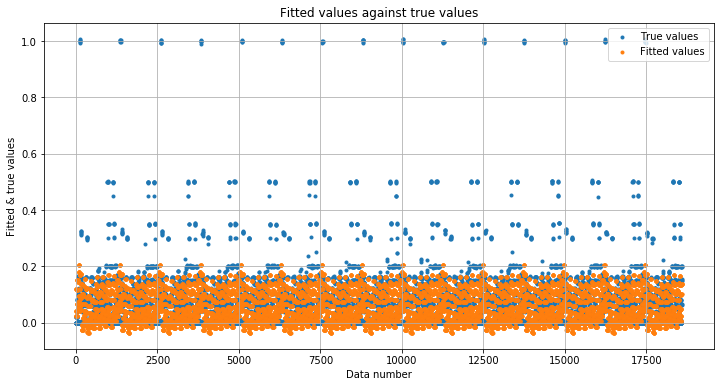

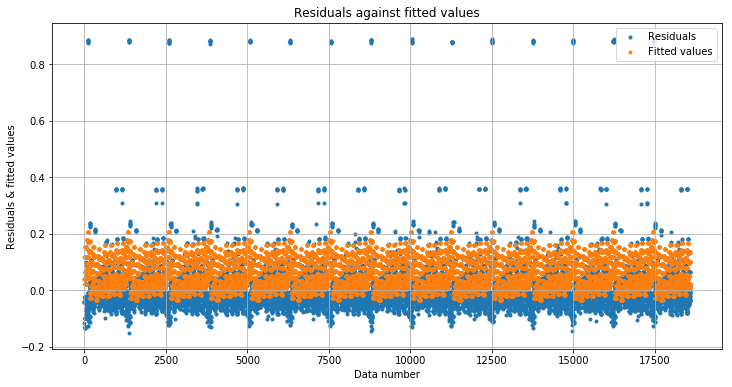

In [19]:
# Best model alpha = 1e-4, all one-hot encoding

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
best_alpha = 1e-4
best_combination = (0, 1, 2, 3, 4)

model = Lasso(alpha=best_alpha)
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = Lasso(alpha=best_alpha)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_lasso_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_lasso_residuals.png')  # Save the figure
plt.show()

#### (a) (v) Elastic Net Regularizer

--------------------------------------------------
Results using alpha =  0.01
Results using l1_ratio =  0.1
Train RMSE: 
[0.10358927628725317, 0.10358935800906734, 0.10233608765655107, 0.10252646635450208, 0.091566344629056551, 0.096577027838866514, 0.10233611428369055, 0.10252655114090306, 0.091566407282233489, 0.096577102355195468, 0.10125844994627278, 0.090192017609022263, 0.095257901520314894, 0.090358882459322928, 0.095436687449337948, 0.091565798068324392, 0.10125847853226765, 0.090192031209330406, 0.095257922670959436, 0.090358948753363796, 0.095436765027488171, 0.091565860738730048, 0.088964679313705858, 0.094100225080582647, 0.09019141321161965, 0.090358351834763401, 0.08896469582206383, 0.094100248334483896, 0.090191426823984427, 0.090358418142234082, 0.088964098544705217, 0.08896411506292097]
Test RMSE: 
[0.10367189158140719, 0.10367113951482548, 0.1024176252785949, 0.10261797651976012, 0.091707525171104948, 0.0967027066206224, 0.10241730958341859, 0.10261712788871602, 0.09

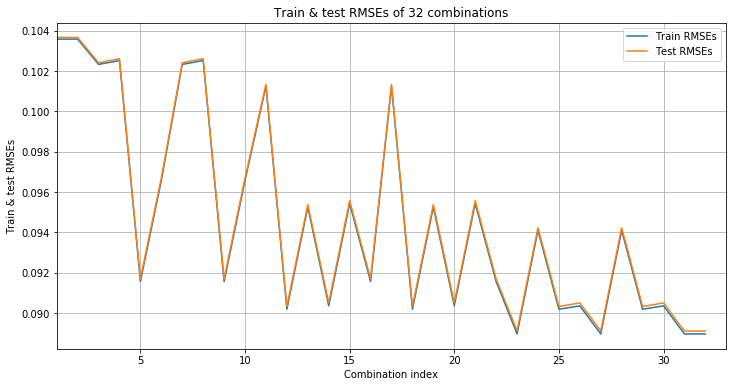

--------------------------------------------------
Results using alpha =  0.01
Results using l1_ratio =  0.5
Train RMSE: 
[0.10362238709026866, 0.10362238709026866, 0.10345364730029966, 0.10380933613790086, 0.094065421026924403, 0.10366822656855447, 0.10345364730029966, 0.10380933613790086, 0.094065421026924403, 0.10366822656855447, 0.10364973968248824, 0.093893595587350429, 0.10349941840160017, 0.094279606261965437, 0.10385815349190823, 0.094201912861977544, 0.10364973968248824, 0.093893595587350429, 0.10349941840160017, 0.094279606261965437, 0.10385815349190823, 0.094201912861977544, 0.094117550382206316, 0.10369848031855262, 0.09403945070463865, 0.094411704091594356, 0.094117550382206316, 0.10369848031855262, 0.09403945070463865, 0.094411704091594356, 0.094259013330890568, 0.094259013330890568]
Test RMSE: 
[0.10370252175773273, 0.10370252175773274, 0.10355743401933938, 0.103893649983112, 0.094175796714088239, 0.10372511518048112, 0.10355743401933938, 0.103893649983112, 0.09417579671

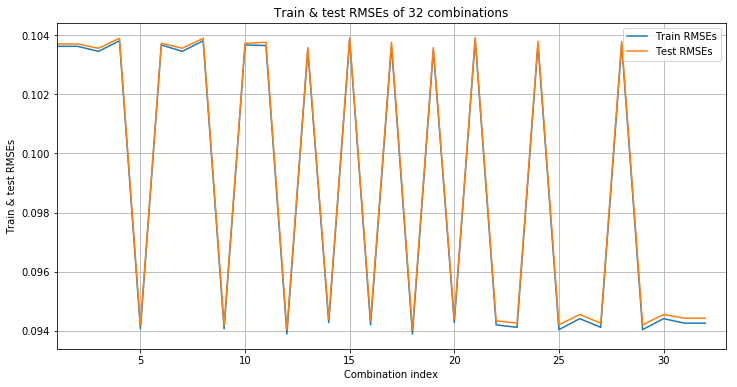

--------------------------------------------------
Results using alpha =  0.01
Results using l1_ratio =  0.9
Train RMSE: 
[0.10369928272054843, 0.10369928272054844, 0.10371038838818747, 0.10411089043459018, 0.097703049131882977, 0.10376488888483441, 0.10371038838818747, 0.10411089043459018, 0.097703049131882977, 0.10376488888483441, 0.10412032633852855, 0.097716304587938216, 0.10377793241904618, 0.098142776074336344, 0.10417840055444827, 0.099048534835376817, 0.10412032633852855, 0.097716304587938216, 0.10377793241904618, 0.098142776074336344, 0.10417840055444827, 0.099048534835376817, 0.098154033406849001, 0.10418962821705531, 0.099058319331555025, 0.099477250616482715, 0.098154033406849001, 0.10418962821705531, 0.099058319331555025, 0.099477250616482715, 0.099485741442356168, 0.099485741442356168]
Test RMSE: 
[0.10377844484029655, 0.10377844484029657, 0.10378547275835946, 0.10418720687704154, 0.097798390184425085, 0.10377101410106873, 0.10378547275835946, 0.10418720687704154, 0.09779

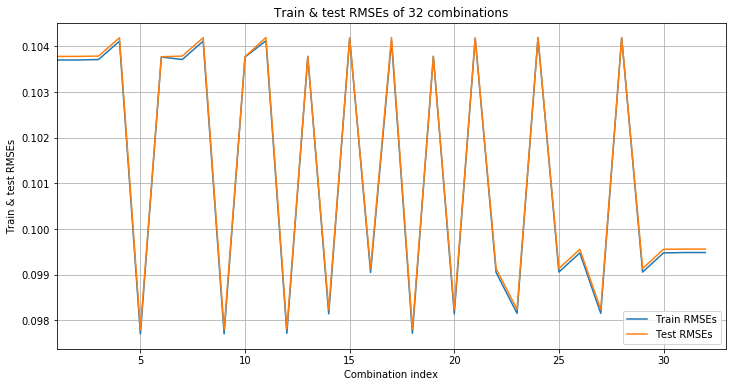

--------------------------------------------------
Results using alpha =  1
Results using l1_ratio =  0.1
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.1041

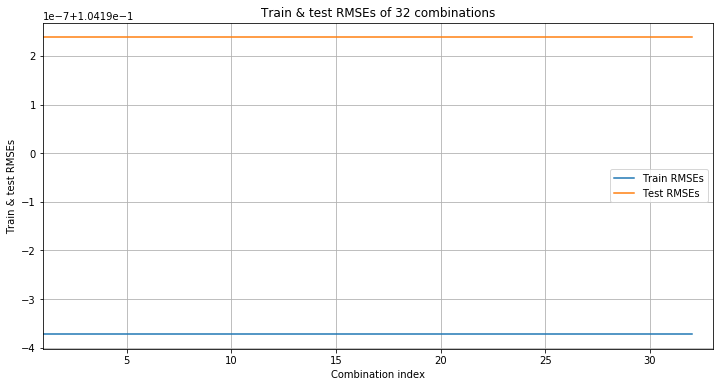

--------------------------------------------------
Results using alpha =  1
Results using l1_ratio =  0.5
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.1041

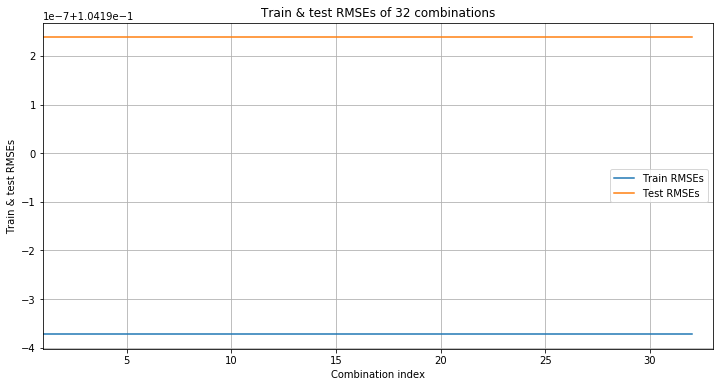

--------------------------------------------------
Results using alpha =  1
Results using l1_ratio =  0.9
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.1041

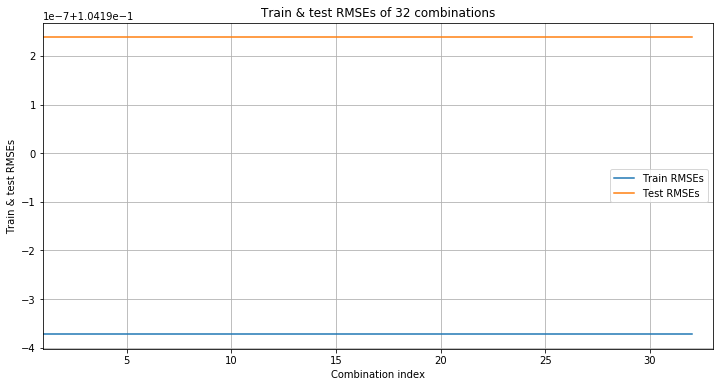

--------------------------------------------------
Results using alpha =  100
Results using l1_ratio =  0.1
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10

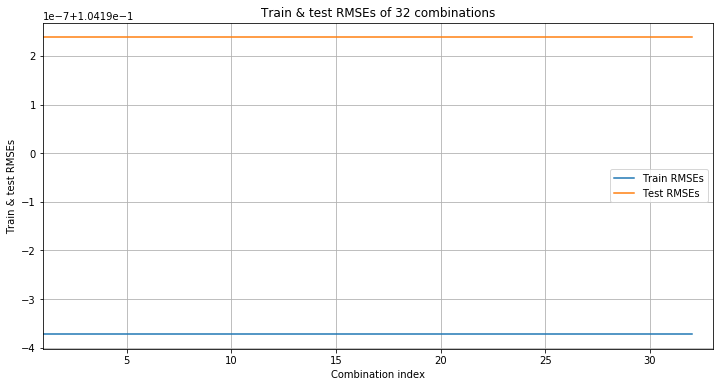

--------------------------------------------------
Results using alpha =  100
Results using l1_ratio =  0.5
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10

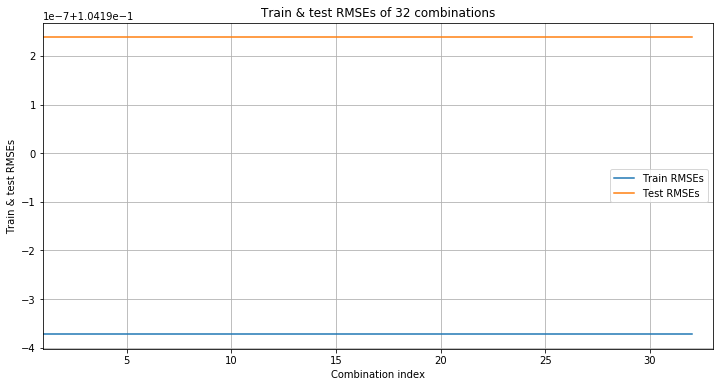

--------------------------------------------------
Results using alpha =  100
Results using l1_ratio =  0.9
Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10

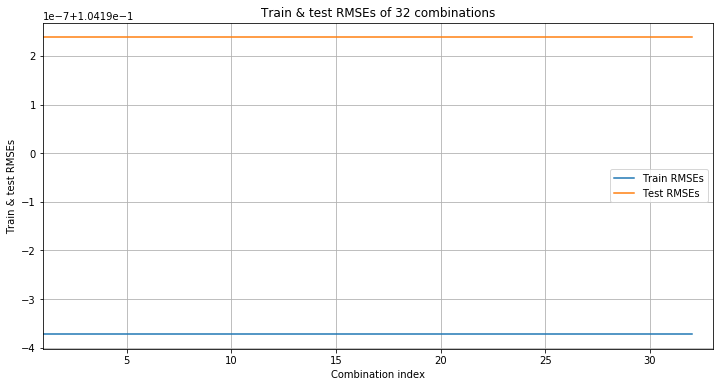

In [17]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# Try different alphas l1_ratios
alphas = [0.01, 1, 100]
l1_ratios = [0.1, 0.5, 0.9]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        
        print('-' * 50)
        print('Results using alpha = ', alpha)
        print('Results using l1_ratio = ', l1_ratio)
        
        # RMSEs
        train_RMSEs = []
        test_RMSEs = []

        # One hot encoding

        for scheme in all_combinations:
            enc = OneHotEncoder(categorical_features=scheme)
            data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

            # CV
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
            scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
            scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

            # RMSE
            train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
            test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))

        print('Train RMSE: ')
        print(train_RMSEs)
        print('Test RMSE: ')
        print(test_RMSEs)

        # Best combinations
        min_RMSE = min(test_RMSEs)
        print('\nMin test RMSE: ', min_RMSE)
        print('Best combinations: ')
        best_combination = all_combinations[np.argmin(test_RMSEs)]
        print('One-Hot features: ', [feature_names[i] for i in best_combination])
        print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

        # Plot the RMSEs
        plt.figure(figsize=(12, 6))
        plt.title("Train & test RMSEs of 32 combinations")
        plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
        plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
        plt.xlabel('Combination index')
        plt.ylabel('Train & test RMSEs')
        plt.xlim(1, 33)
        plt.grid()
        plt.legend()
        plt.savefig(('Figures/Question2_a_v_ElasticNet_a_%f_l1_%f.png' % (alpha, l1_ratio))) # Save the figure
        plt.show()

Train RMSE: 
0.0889641150629
Test RMSE: 
0.089110136077


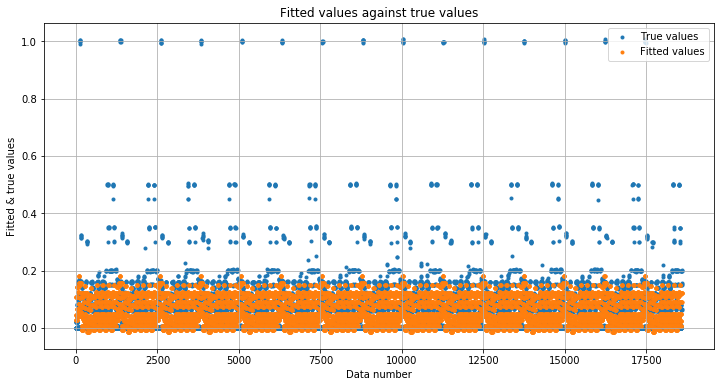

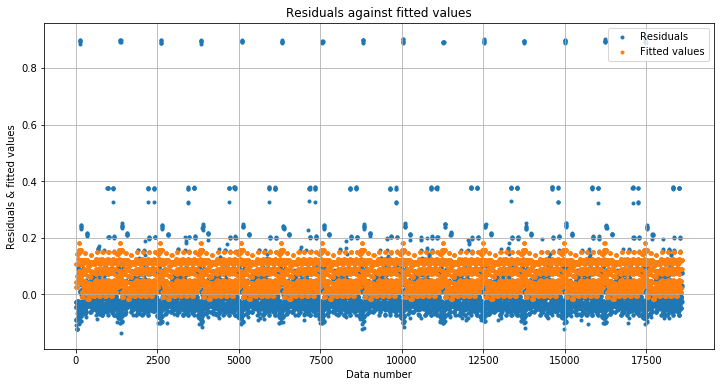

In [18]:
# Best model

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
best_aplha = 0.01
best_l1_ratio = 0.1
best_combination= (0, 1, 2, 3, 4)

model = ElasticNet(alpha=best_aplha, l1_ratio=best_l1_ratio)
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = ElasticNet(alpha=best_aplha, l1_ratio=best_l1_ratio)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ElasticNet_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ElasticNet_residuals.png')  # Save the figure
plt.show()

#### (b) (i)

Train RMSE: 
0.060514412777
Test RMSE: 
0.0605990304804
Out Of Bag error:  0.34311621073


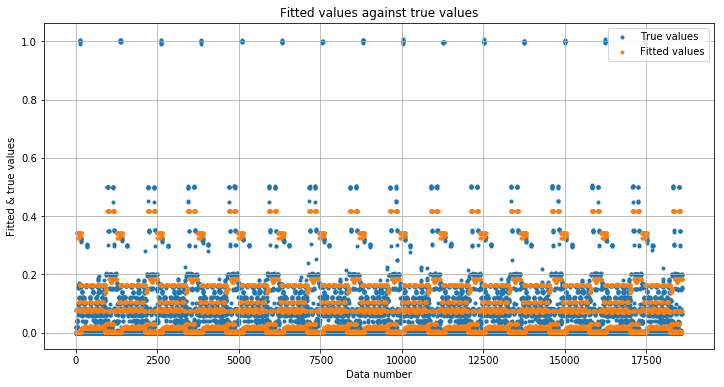

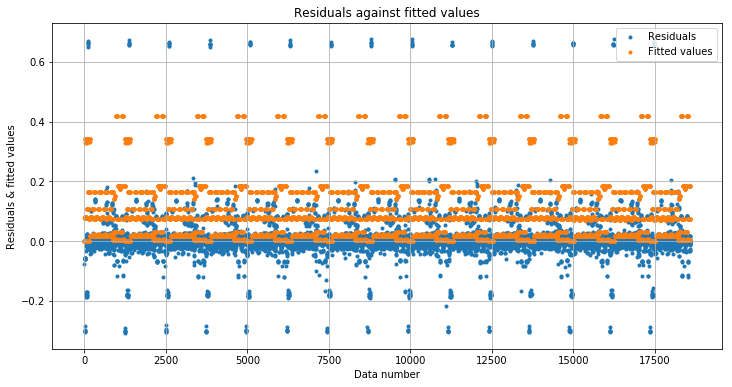

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

# Model
model = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, bootstrap=True, oob_score=True)

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, bootstrap=True, oob_score=True)
model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
predict_values = model_whole.predict(all_data_scalar[:, 0:5])
oob_score_ = model_whole.oob_score_
print('Out Of Bag error: ', 1 - oob_score_)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_i_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_i_residuals.png')  # Save the figure
plt.show()

#### (b) (ii)

In [34]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

# Number of features
feature_nums = range(1, 6)

# Number of trees
tree_nums = range(1, 201)

# All oob scores
oob_errors = []

for feature_num in feature_nums:
    for tree_num in tree_nums:
        # Use the whole data set for training
        model_whole = RandomForestRegressor(n_estimators=tree_num, max_features=feature_num, max_depth=4, bootstrap=True, oob_score=True)
        model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
        predict_values = model_whole.predict(all_data_scalar[:, 0:5])
        oob_errors.append(1 - model_whole.oob_score_)


Min oob_error:  0.316476649167
Best tree number:  49
Best feature number:  3


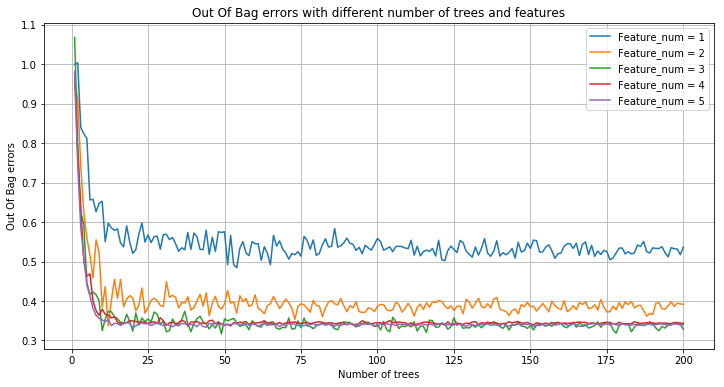

In [44]:
# Best OOB errors
min_oob_error = min(oob_errors)
print('\nMin oob_error: ', min_oob_error)
best_tree_num = tree_nums[np.argmin(oob_errors) % len(tree_nums)]
print('Best tree number: ', best_tree_num)
best_feature_num = feature_nums[np.argmin(oob_errors) // len(tree_nums)]
print('Best feature number: ', best_feature_num)

# Plot Out Of Bag errors
plt.figure(figsize=(12, 6))
plt.title("Out Of Bag errors with different number of trees and features")
for i in range(len(feature_nums)):
    plt.plot(tree_nums, oob_errors[i*len(tree_nums):i*len(tree_nums)+len(tree_nums)], label=('Feature_num = %d' % feature_nums[i]))
plt.xlabel('Number of trees')
plt.ylabel('Out Of Bag errors')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_ii_OOBerror.png')  # Save the figure
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

# Number of features
feature_nums = range(1, 6)

# Number of trees
tree_nums = range(1, 201)

# All Test_rmse
rmses_test = []

for feature_num in feature_nums:
    for tree_num in tree_nums:
        # Model
        model = RandomForestRegressor(n_estimators=tree_num, max_features=feature_num, max_depth=4, bootstrap=True, oob_score=True)

        # CV
        scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
        scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

        # RMSE
        rmses_test.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))


Min RMSE:  0.0594710982746
Best tree number:  7
Best feature number:  3


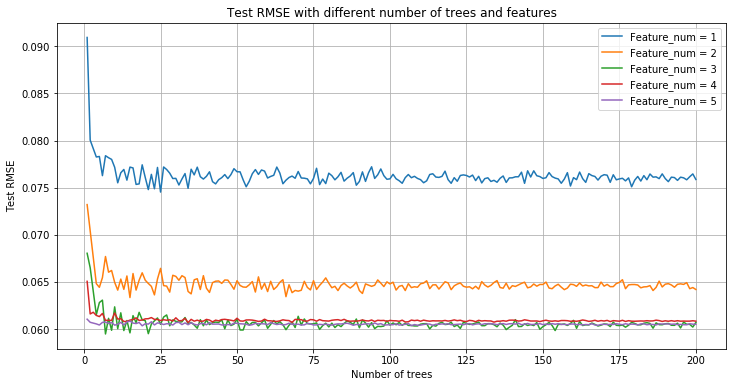

In [43]:
# Best RMSE
min_RMSE = min(rmses_test)
print('\nMin RMSE: ', min_RMSE)
best_tree_num = tree_nums[np.argmin(rmses_test) % len(tree_nums)]
print('Best tree number: ', best_tree_num)
best_feature_num = feature_nums[np.argmin(rmses_test) // len(tree_nums)]
print('Best feature number: ', best_feature_num)

# Plot Out Of Bag errors
plt.figure(figsize=(12, 6))
plt.title("Test RMSE with different number of trees and features")
for i in range(len(feature_nums)):
    plt.plot(tree_nums, rmses_test[i*len(tree_nums):i*len(tree_nums)+len(tree_nums)], label=('Feature_num = %d' % feature_nums[i]))
plt.xlabel('Number of trees')
plt.ylabel('Test RMSE')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_ii_RMSE.png')  # Save the figure
plt.show()

Train RMSE: 
0.0622698079894
Test RMSE: 
0.0625002197091
Out Of Bag error:  0.501978409403


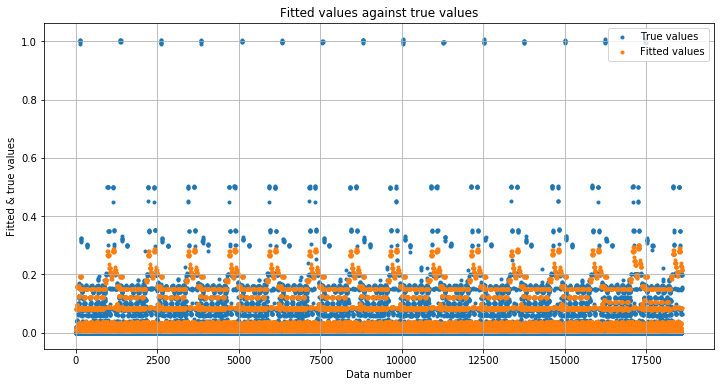

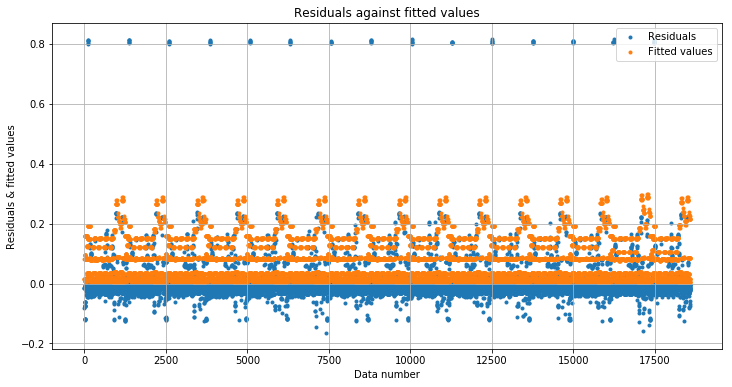

In [51]:
# Best model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

best_tree_num = 7
best_feature_num = 3

# Model
model = RandomForestRegressor(n_estimators=best_tree_num, max_features=best_feature_num, max_depth=4, bootstrap=True, oob_score=True)

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = RandomForestRegressor(n_estimators=best_tree_num, max_features=best_feature_num, max_depth=4, bootstrap=True, oob_score=True)
model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
predict_values = model_whole.predict(all_data_scalar[:, 0:5])
oob_score_ = model_whole.oob_score_
print('Out Of Bag error: ', 1 - oob_score_)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_ii_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_ii_residuals.png')  # Save the figure
plt.show()

#### (b) (iii)

In [76]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

# Number of features
feature_num = 3

# Number of trees
tree_nums = range(1, 201)

# Max depth
max_depths = range(4, 11)

# All oob scores
oob_errors_2 = []

for max_depth in max_depths:
    for tree_num in tree_nums:
        # Use the whole data set for training
        model_whole = RandomForestRegressor(n_estimators=tree_num, max_features=feature_num, max_depth=max_depth, bootstrap=True, oob_score=True)
        model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
        predict_values = model_whole.predict(all_data_scalar[:, 0:5])
        oob_errors_2.append(1 - model_whole.oob_score_)


Min oob_error:  0.0155004048689
Best tree number:  199
Best max depth:  10


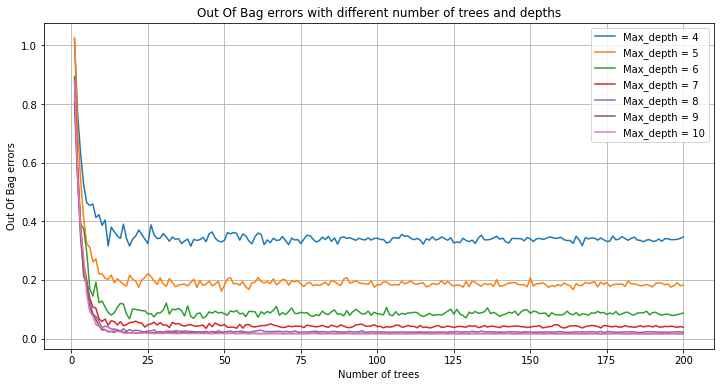

In [79]:
# Best OOB errors
min_oob_error = min(oob_errors_2)
print('\nMin oob_error: ', min_oob_error)
best_tree_num = tree_nums[np.argmin(oob_errors_2) % len(tree_nums)]
print('Best tree number: ', best_tree_num)
best_feature_num = max_depths[np.argmin(oob_errors_2) // len(tree_nums)]
print('Best max depth: ', best_feature_num)

# Plot Out Of Bag errors
plt.figure(figsize=(12, 6))
plt.title("Out Of Bag errors with different number of trees and depths")
for i in range(len(max_depths)):
    plt.plot(tree_nums, oob_errors_2[i*len(tree_nums):i*len(tree_nums)+len(tree_nums)], label=('Max_depth = %d' % max_depths[i]))
plt.xlabel('Number of trees')
plt.ylabel('Out Of Bag errors')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_iii_OOBerror.png')  # Save the figure
plt.show()

In [80]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

# Number of features
feature_num = 3

# Number of trees
tree_nums = range(1, 201)

# Max depth
max_depths = range(4, 11)

# All Test_rmse
rmses_test_2 = []

for max_depth in max_depths:
    for tree_num in tree_nums:
        # Model
        model = RandomForestRegressor(n_estimators=tree_num, max_features=feature_num, max_depth=max_depth, bootstrap=True, oob_score=True)

        # CV
        scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
        scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

        # RMSE
        rmses_test_2.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))


Min RMSE:  0.0135348089485
Best tree number:  112
Best max depth:  10


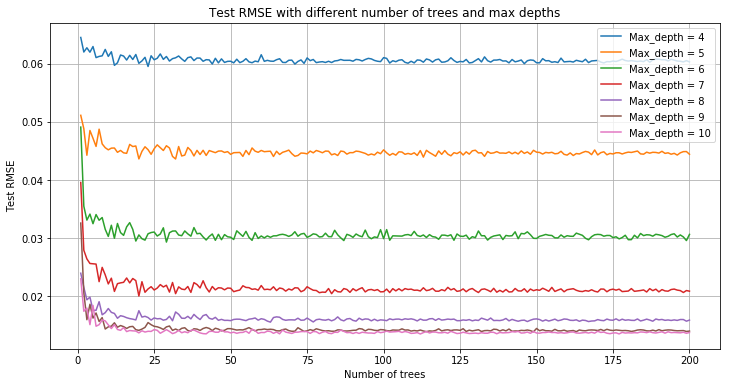

In [81]:
# Best RMSE
min_RMSE = min(rmses_test_2)
print('\nMin RMSE: ', min_RMSE)
best_tree_num = tree_nums[np.argmin(rmses_test_2) % len(tree_nums)]
print('Best tree number: ', best_tree_num)
best_max_depth = max_depths[np.argmin(rmses_test_2) // len(tree_nums)]
print('Best max depth: ', best_max_depth)

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.title("Test RMSE with different number of trees and max depths")
for i in range(len(max_depths)):
    plt.plot(tree_nums, rmses_test_2[i*len(tree_nums):i*len(tree_nums)+len(tree_nums)], label=('Max_depth = %d' % max_depths[i]))
plt.xlabel('Number of trees')
plt.ylabel('Test RMSE')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_iii_RMSE.png')  # Save the figure
plt.show()

#### (b) (iv)

Train RMSE: 
0.0113901185016
Test RMSE: 
0.0136852107899
Out Of Bag error:  0.0159808562862
Feature name:  ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
Feature importances:  [ 0.00456987  0.29402742  0.3405605   0.1683513   0.19249091]


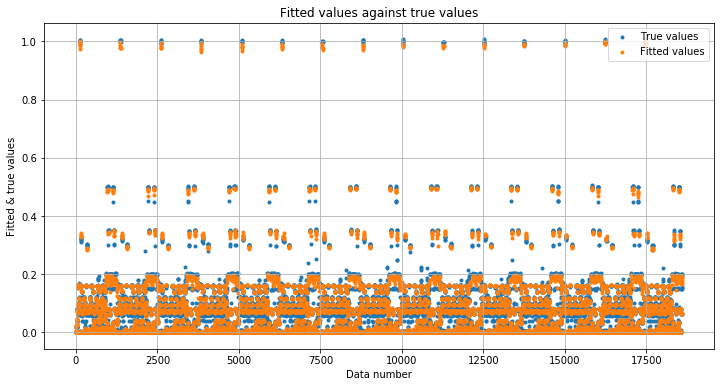

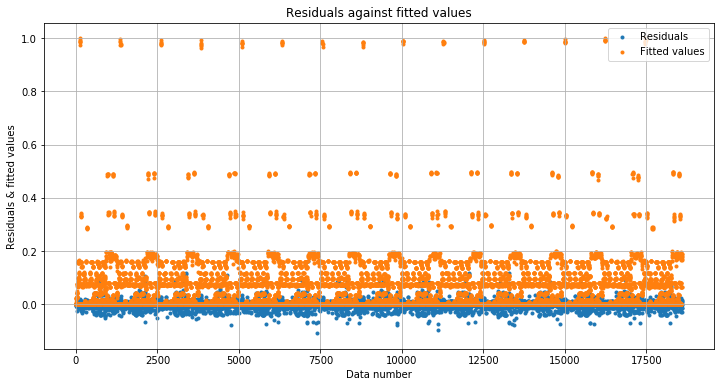

In [93]:
# Best model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignore warnings

best_tree_num = 112
best_feature_num = 3
max_depth = 10

# Model
model = RandomForestRegressor(n_estimators=best_tree_num, max_features=best_feature_num, max_depth=max_depth, bootstrap=True, oob_score=True)

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = RandomForestRegressor(n_estimators=best_tree_num, max_features=best_feature_num, max_depth=max_depth, bootstrap=True, oob_score=True)
model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
predict_values = model_whole.predict(all_data_scalar[:, 0:5])
oob_score_ = model_whole.oob_score_
print('Out Of Bag error: ', 1 - oob_score_)
print('Feature name: ', feature_names)
print('Feature importances: ', model_whole.feature_importances_)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_iv_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_b_iv_residuals.png')  # Save the figure
plt.show()

#### (b) (v)

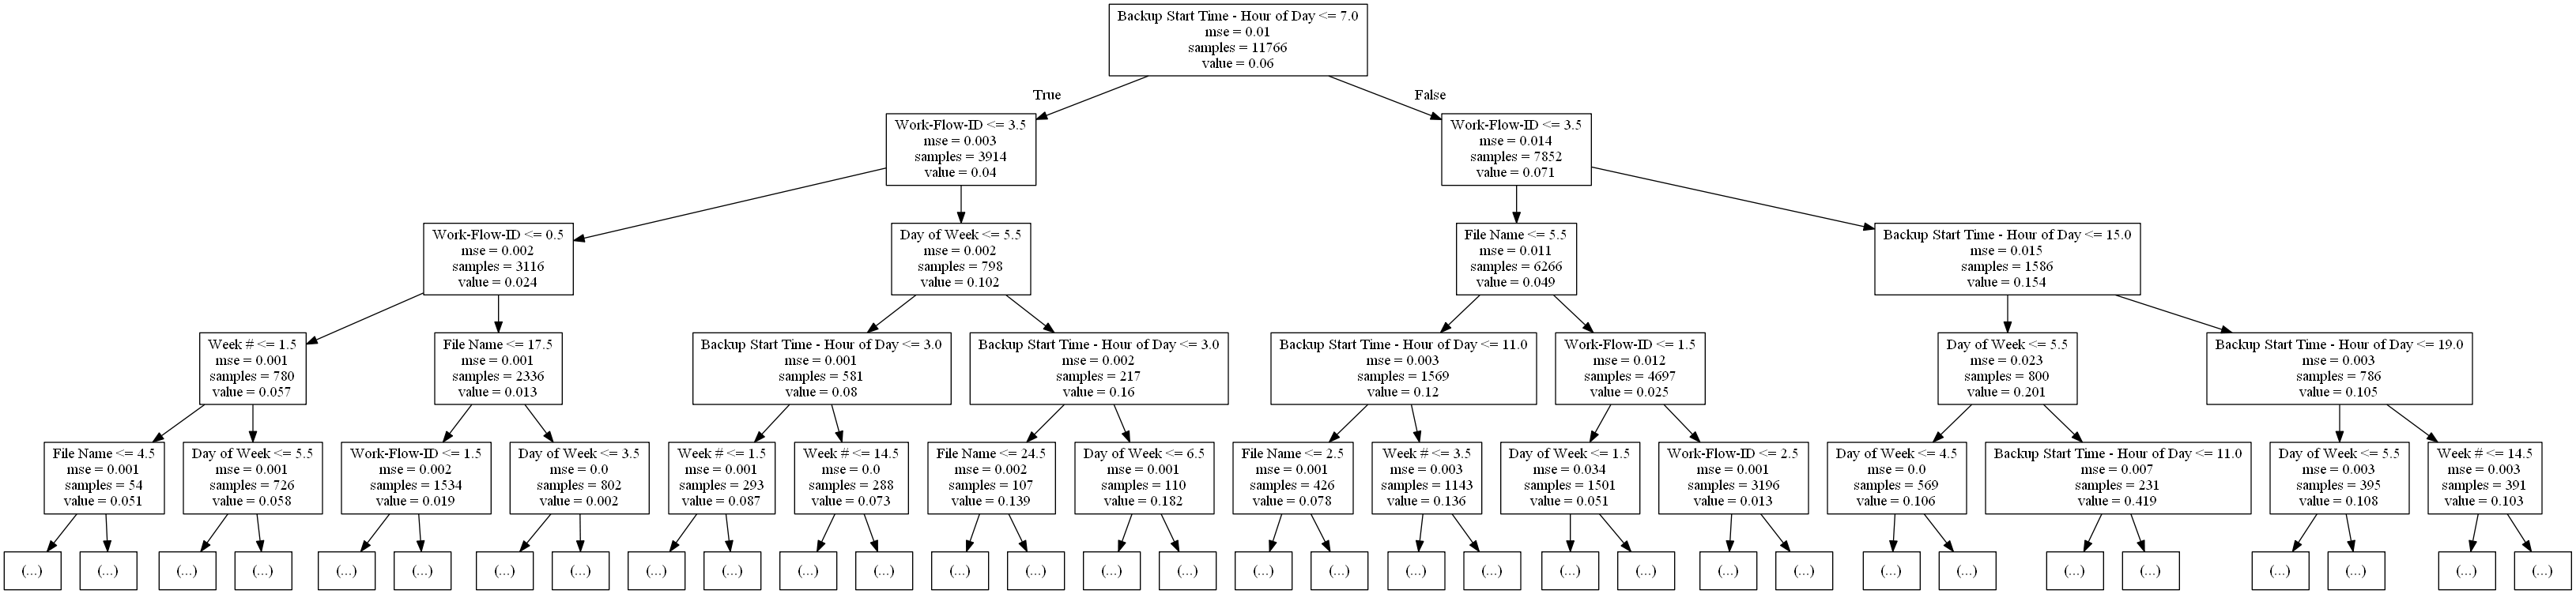

In [100]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os

# Set path
os.environ["PATH"] += os.pathsep + 'F:/Graphviz2.38/bin/'

# Display tree
one_tree = model_whole.estimators_[33]
export_graphviz(one_tree, max_depth=4, feature_names=feature_names)
pydot_graph = pydotplus.graph_from_dot_file("tree.dot")
Image(pydot_graph.create_png())


In [101]:
# Save as png
os.system("dot -Tpng tree.dot -o Figures/question_2_b_v_tree.png")

0

#### (c)

In [102]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder

# Activation functions
activations = ['logistic', 'tanh', 'relu']

# Number of hidden units
hidden_units = range(1, 201)

# Store RMSEs
rmses_test_3 = []

# Use one-hot data
enc = OneHotEncoder(categorical_features=(0, 1, 2, 3, 4))
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])


for activation in activations:
    for hidden_unit in hidden_units:
        
        # Model
        model = MLPRegressor(hidden_layer_sizes=(hidden_unit), activation=activation)

        # CV
        scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
        scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

        # RMSE
        rmses_test_3.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))


Min RMSE:  0.0306280545546
Best hidden unit number:  190
Best activation:  relu


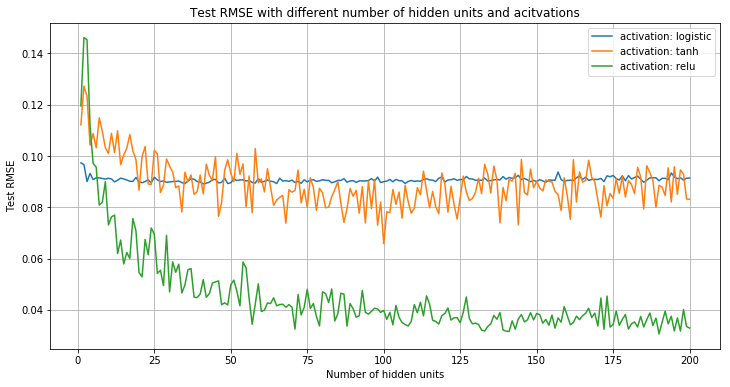

In [105]:
# Best RMSE
min_RMSE = min(rmses_test_3)
print('\nMin RMSE: ', min_RMSE)
best_hidden_unit_num = hidden_units[np.argmin(rmses_test_3) % len(hidden_units)]
print('Best hidden unit number: ', best_hidden_unit_num)
best_activation = activations[np.argmin(rmses_test_3) // len(hidden_units)]
print('Best activation: ', best_activation)

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.title("Test RMSE with different number of hidden units and acitvations")
for i in range(len(activations)):
    plt.plot(hidden_units, rmses_test_3[i*len(hidden_units):i*len(hidden_units)+len(hidden_units)], label=('activation: %s' % activations[i]))
plt.xlabel('Number of hidden units')
plt.ylabel('Test RMSE')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_c_RMSE.png')  # Save the figure
plt.show()

Train RMSE: 
0.0191107607826
Test RMSE: 
0.0343930517408


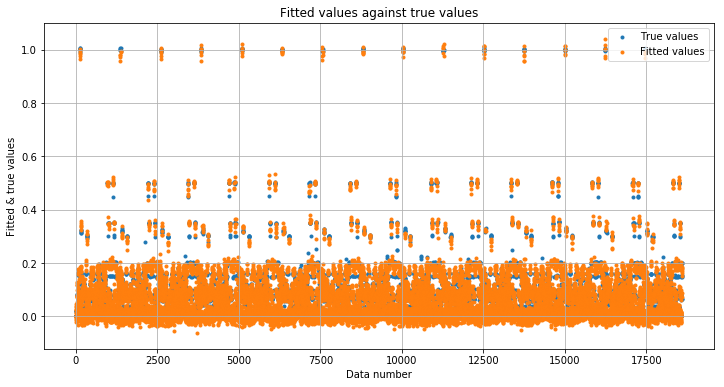

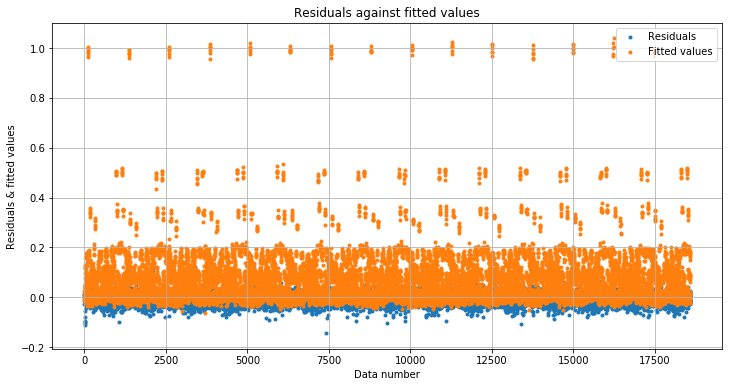

In [107]:
# Best model
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

best_hidden_unit_num = 190
best_activation = 'relu'

# Use one-hot data
enc = OneHotEncoder(categorical_features=(0, 1, 2, 3, 4))
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# Model
model = MLPRegressor(hidden_layer_sizes=(best_hidden_unit_num), activation=best_activation)

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = MLPRegressor(hidden_layer_sizes=(best_hidden_unit_num), activation=best_activation)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_c_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_c_residuals.png')  # Save the figure
plt.show()